<a href="https://colab.research.google.com/github/shehab0911/Fake-News-Detection_Machine-Learning/blob/main/Submitted_in_CSE_445.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('train.csv')
ds=pd.read_csv('test.csv')

In [ ]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
ds

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
ds.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [ ]:
ds.tail()

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [ ]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
ds.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [ ]:
df.shape

(20800, 5)

In [ ]:
ds.shape

(5200, 4)

In [ ]:
df.size, ds.size

(104000, 20800)

In [ ]:
print(df.columns.values)

['id' 'title' 'author' 'text' 'label']


In [ ]:
print(ds.columns.values)

['id' 'title' 'author' 'text']


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


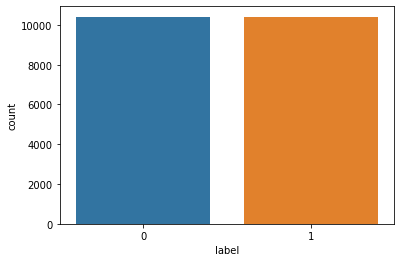

In [ ]:
sns.countplot(df['label'],label="Count")

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
train_missing= missing_values_table(df)
train_missing

Your selected dataframe has 5 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
author,1957,9.4
title,558,2.7
text,39,0.2


In [ ]:
train_missing= missing_values_table(ds)
train_missing

Your selected dataframe has 4 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
author,503,9.7
title,122,2.3
text,7,0.1


In [ ]:
new=df.fillna('true')

In [ ]:
print(new)

          id  ... label
0          0  ...     1
1          1  ...     0
2          2  ...     1
3          3  ...     1
4          4  ...     1
...      ...  ...   ...
20795  20795  ...     0
20796  20796  ...     0
20797  20797  ...     0
20798  20798  ...     1
20799  20799  ...     1

[20800 rows x 5 columns]


In [ ]:
new.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
new['subject']=new['title']+''+new['author']

In [ ]:
print(new)

          id  ...                                            subject
0          0  ...  House Dem Aide: We Didn’t Even See Comey’s Let...
1          1  ...  FLYNN: Hillary Clinton, Big Woman on Campus - ...
2          2  ...  Why the Truth Might Get You FiredConsortiumnew...
3          3  ...  15 Civilians Killed In Single US Airstrike Hav...
4          4  ...  Iranian woman jailed for fictional unpublished...
...      ...  ...                                                ...
20795  20795  ...  Rapper T.I.: Trump a ’Poster Child For White S...
20796  20796  ...  N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797  20797  ...  Macy’s Is Said to Receive Takeover Approach by...
20798  20798  ...  NATO, Russia To Hold Parallel Exercises In Bal...
20799  20799  ...             What Keeps the F-35 AliveDavid Swanson

[20800 rows x 6 columns]


In [ ]:
x=new.drop(columns='label', axis=1)
y=new['label']

In [ ]:
print(x)
print(y)

          id  ...                                            subject
0          0  ...  House Dem Aide: We Didn’t Even See Comey’s Let...
1          1  ...  FLYNN: Hillary Clinton, Big Woman on Campus - ...
2          2  ...  Why the Truth Might Get You FiredConsortiumnew...
3          3  ...  15 Civilians Killed In Single US Airstrike Hav...
4          4  ...  Iranian woman jailed for fictional unpublished...
...      ...  ...                                                ...
20795  20795  ...  Rapper T.I.: Trump a ’Poster Child For White S...
20796  20796  ...  N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797  20797  ...  Macy’s Is Said to Receive Takeover Approach by...
20798  20798  ...  NATO, Russia To Hold Parallel Exercises In Bal...
20799  20799  ...             What Keeps the F-35 AliveDavid Swanson

[20800 rows x 5 columns]
0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 2080

In [ ]:
new['subject'] = new['subject'].apply(lambda x: x.lower())
new.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide: we didn’t even see comey’s let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"flynn: hillary clinton, big woman on campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you firedconsortiumnew...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed for fictional unpublished...


In [ ]:
import string

def punctuation_removal(title):
    all_list = [char for char in title if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

new['subject'] = new['subject'].apply(punctuation_removal)

In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

new['subject'] = new['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = new['subject'].values
Y = new['label'].values

In [ ]:
print(x)

['house dem aide didn’t even see comey’s letter jason chaffetz tweeted itdarrell lucus'
 'flynn hillary clinton big woman campus breitbartdaniel j flynn'
 'truth might get firedconsortiumnewscom' ...
 'macy’s said receive takeover approach hudson’s bay new york timesmichael j de la merced rachel abrams'
 'nato russia hold parallel exercises balkansalex ansary'
 'keeps f35 alivedavid swanson']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

X = vectorizer.transform(x)

In [ ]:
print(X)

  (0, 30853)	0.35663209407925345
  (0, 25772)	0.2346422332246453
  (0, 17477)	0.3095618755872099
  (0, 16971)	0.25618718828241255
  (0, 15645)	0.2812984147316227
  (0, 15519)	0.3713212198991587
  (0, 14193)	0.1912756095640868
  (0, 10399)	0.2359135160097395
  (0, 8497)	0.25470829552015894
  (0, 8075)	0.25618718828241255
  (0, 6274)	0.21256985191281788
  (0, 5404)	0.3130147577096588
  (0, 1446)	0.2708763141023178
  (1, 32980)	0.29655292367450165
  (1, 13792)	0.1894239964662223
  (1, 11598)	0.6966756221588798
  (1, 5960)	0.19178052531408096
  (1, 4948)	0.3751152423795817
  (1, 4338)	0.36060535122948467
  (1, 3653)	0.2886010329535051
  (2, 30710)	0.44366211839944725
  (2, 18542)	0.47498004996611987
  (2, 12405)	0.3696733793302551
  (2, 11380)	0.6640026125295339
  (3, 31400)	0.18427942186677157
  :	:
  (20797, 29497)	0.1950196287266844
  (20797, 28472)	0.3219654006899741
  (20797, 25203)	0.24153225050636917
  (20797, 23666)	0.3084276697240418
  (20797, 23296)	0.2566902006504416
  (20797, 1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:

# Importing Classifier Modules for our model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score

Logistic Regression Algorithm

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X,Y)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X)
training_data_accuracy = accuracy_score(X_train_prediction, Y)

In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X)
test_data_accuracy = accuracy_score(X_test_prediction, Y)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9853846153846154


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.svm import SVC


#Random forest algorithm


In [ ]:
rdm=RandomForestClassifier(random_state=0)

In [ ]:
rdm.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
X_test_prediction = rdm.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9850961538461539


Decision Tree Algorithm

In [ ]:
dc=DecisionTreeClassifier()

In [ ]:
dc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
X_test_prediction = dc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9875


Confusion Matrix

In [ ]:
print(classification_report(Y,X_test_prediction))
print(confusion_matrix(Y,X_test_prediction ))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     10387
           1       0.98      0.99      0.99     10413

    accuracy                           0.99     20800
   macro avg       0.99      0.99      0.99     20800
weighted avg       0.99      0.99      0.99     20800

[[10153   234]
 [   70 10343]]


In [ ]:
clf.fit(X,Y)

SVC()

In [ ]:
submission = pd.DataFrame({
        "id": X["id"],
        "label": prediction
    })

submission.to_csv('submission2.csv', index=False)
print("Submission Created Successfully")

NameError: ignored